## Fluctuation on GROMACS mdrun

Experiment setup:
- resource: XSEDE Comet (regular (RM) queue - not shared)
- number of node: 1
- number of cores: 16
- number of ensemble: 32
- number of steps: 640,000
- timeframe: repeated by every 2-6 hour between 04/23/2019 and 05/14/2019
- system: 33k atoms (borrowed from [radical.canon](https://github.com/radical-experiments/radical.canon/tree/master/gromacs/large))


In [2]:
import seaborn
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df32 = {}

### First Run - 3 days

We started new test with a fixed number of cores on Comet between 04/23 - 04/26. ([Previous test run](http://129.114.17.248:8888/notebooks/Fluctuation%20of%20running%20MD%20Simulation.ipynb) was done by varing core count and ensemble size.) 
The first run showed a fluctuation in a certain time frame of 4PM each day (see results on 16:00 or after).

Text(0.5,1,u'MD Run in 3 days')

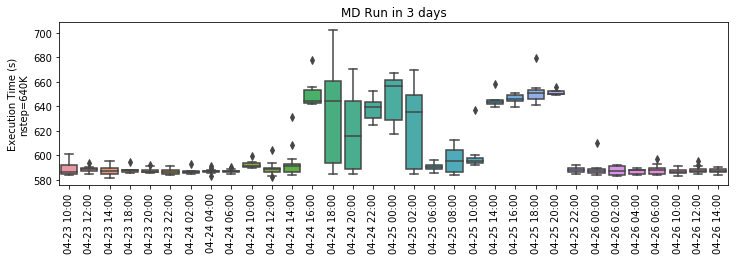

In [72]:
fname='results_16_1_640000_32_11.csv'
df32[fname] = pd.read_csv(open("straggler/gromacs/{}".format(fname)), sep=",", parse_dates=['datetime'])
xtick_interval = 2 # hours

fig, axes = plt.subplots(1, 1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df32[fname].wall_time), index=df32[fname].datetime)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nnstep={}'.format('640K'))
axes.set_title('MD Run in 3 days')

### Second Run - 10 days

Another test was completed to see if there is a pattern of the fluctuation at a certain time but with a longer period. We observed the similar fluctuation on a few days (04/30 and 05/06) and didn't see on other dates.

Text(0.5,1,u'MD Run between 04/29 - 05/09')

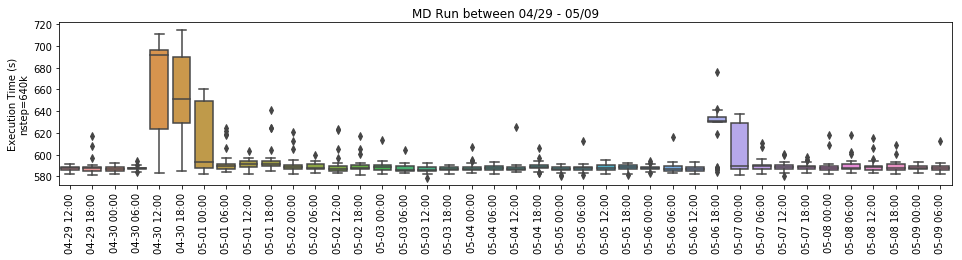

In [71]:
fname='results_16_1_640000_32_2nd.csv'
df32[fname] = pd.read_csv(open("straggler/gromacs/{}".format(fname)), sep=",", parse_dates=['datetime'])
xtick_interval = 6 #hours
fig, axes = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df32[fname].wall_time), index=df32[fname].datetime)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nnstep={}'.format('640k'))
axes.set_title('MD Run in 10 d')

### MDRun along with Matrix Multiplication (CPU Stress Test)

I ran two jobs on Bridges, one is for mdrun and the another one is for matrix multiplication simply generating CPU intensive tasks. Both results indicate that the fluctuation at the similar timeframe, on 05/10 which may conclude that there is a wide impact on the whole systems, PSC bridges.

Text(0.5,1,u'MD Run between 05/09 - 05/14')

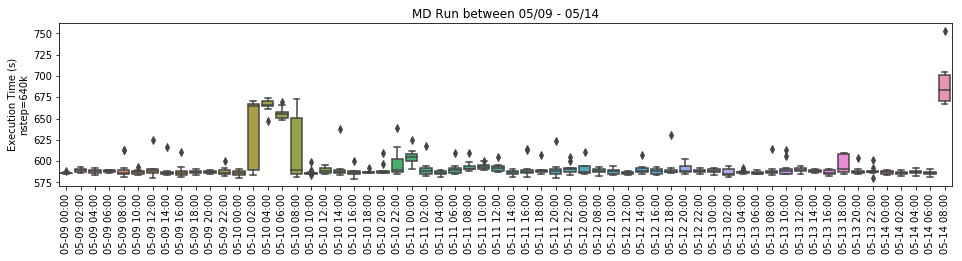

In [65]:
fname='results_16_1_640000_32_3rd.csv'
df32[fname] = pd.read_csv(open("straggler/gromacs/{}".format(fname)), sep=",", parse_dates=['datetime'])
df_part=df32[fname]
df_part = df_part[df_part.datetime > "2019-05-09"]
xtick_interval = 2 #hours
fig, axes = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df_part.wall_time), index=df_part.datetime)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nnstep={}'.format('640k'))
axes.set_title('MD Run between 05/09 - 05/14')

Text(0.5,1,u'Matrix Multiplication between 05/09 - 05/14')

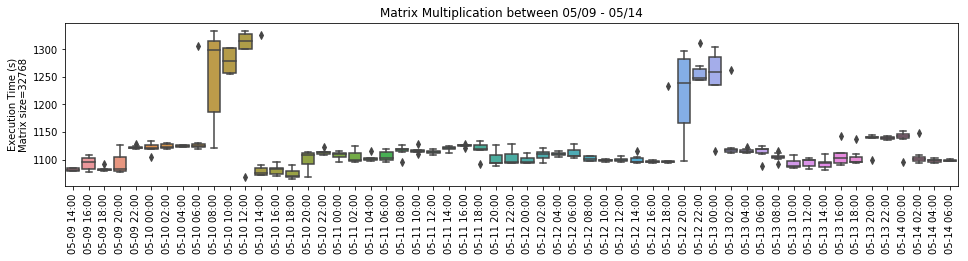

In [8]:
fname='flops.log.updated.24cores.csv'
df32[fname] = pd.read_csv(open("straggler/flops/{}".format(fname)), sep=",", parse_dates = ['date'])
xtick_interval = 2 #hours
fig, axes = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df32[fname].elapsed_time), index=df32[fname].date)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nMatrix size={}'.format(2**15))
axes.set_title('Matrix Multiplication between 05/09 - 05/14')

## 2 Nodes

Text(0.5,1,u'MD Run between 05/09 - 05/14')

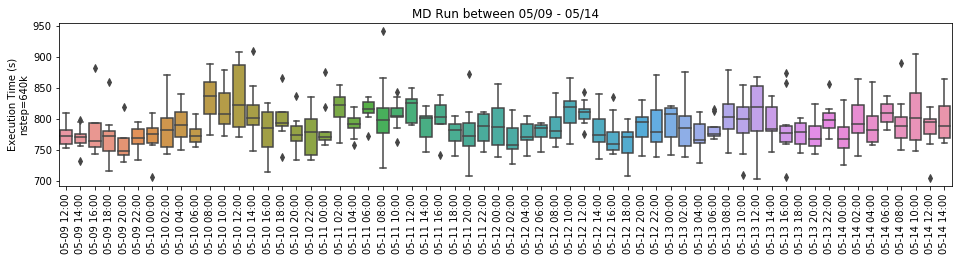

In [7]:
fname='results_all_32_1_1280000_32_60runs.csv'
df32[fname] = pd.read_csv(open("straggler/gromacs/{}".format(fname)), sep=",", parse_dates=['datetime'])
df_part=df32[fname]
df_part = df_part[df_part.datetime > "2019-05-09 12:00:00"]
xtick_interval = 2 #hours
fig, axes = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df_part.wall_time), index=df_part.datetime)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nnstep={}'.format('1280k'))
axes.set_title('MD Run between 05/09 - 05/14')

Text(0.5,1,u'Matrix Multiplication between 05/09 - 05/14')

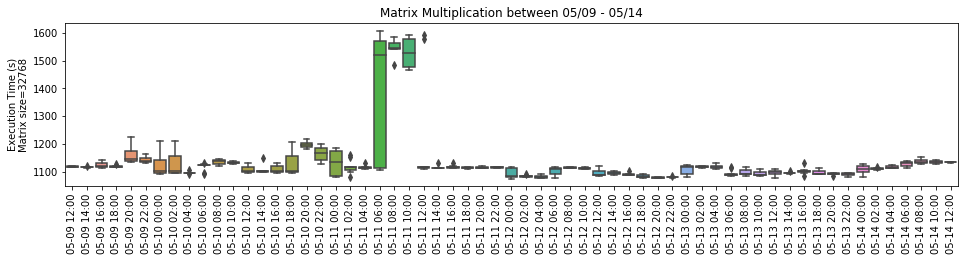

In [5]:
fname='flops.log.2nodes.48cores.csv'
df32[fname] = pd.read_csv(open("straggler/flops/{}".format(fname)), sep=",", parse_dates = ['date'])
xtick_interval = 2 #hours
fig, axes = plt.subplots(1, 1, figsize=(16, 3))
plt.subplots_adjust(wspace=0.5, hspace=0.9)

ts = pd.Series(np.array(df32[fname].elapsed_time), index=df32[fname].date)
seaborn.boxplot([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index], ts, ax=axes)
tmp=list(set([(dt - datetime.timedelta(hours=int(dt.hour % xtick_interval))).strftime('%Y%m%d%H') for dt in ts.index]))
tmp.sort()
axes.set_xticklabels([datetime.datetime.strptime(d, "%Y%m%d%H").strftime("%m-%d %H:00") for d in tmp], rotation=90)
axes.set_ylabel('Execution Time (s)\nMatrix size={}'.format(2**15))
axes.set_title('Matrix Multiplication between 05/09 - 05/14')